Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


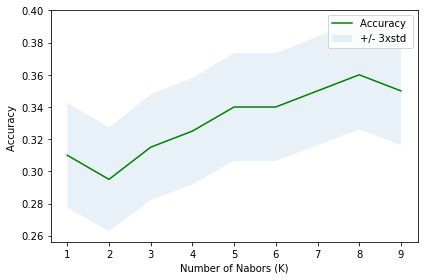

Best Accuracy is  0.36  where k is  8


In [44]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

df =  pd.read_csv('teleCust1000t.csv')
df.head()

x = df[['region','tenure','marital','address','income','ed','employ','retire','gender','reside']].values
y = df['custcat'].values
#print(y[0:5])

#Normalize Data (Good Practice)
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

# Train - Test split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


#Train the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks=10
accuracy = np.zeros(ks-1)
sd = np.zeros(ks-1)
for n in range(1,ks):
    model  = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_predict = model.predict(x_test)
    accuracy[n-1] = metrics.accuracy_score(y_test,y_predict)
    sd[n-1] = np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

plt.plot(range(1,ks),accuracy,'g')
plt.fill_between(range(1,ks),accuracy - 1 * sd,accuracy + 1 * sd, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print('Best Accuracy is ',accuracy.max() , ' where k is ', accuracy.argmax() + 1 )